In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

In [3]:
from classes.photon_numba import simulate, create_doms

In [4]:
mpl.rcParams["xtick.labelsize"] = 15
mpl.rcParams["ytick.labelsize"] = 15
mpl.rcParams["axes.labelsize"] = 20
mpl.rcParams["legend.fontsize"] = 15

In [5]:
threads_per_block = 32 #64#32
blocks = 8000 #2000#4000
N = threads_per_block * blocks
Nphotons = 1000

xlim = [-40, 40]
ylim = [-40, 40]
dx = 20
dy = 20
r = 2

doms, rs = create_doms(xlim, ylim, dx, dy, r)

PA = 0.01
PS = 0.02
pInit = np.array([0.0, 0.0])
Nexp = 1

In [10]:
stuff = simulate(Nexp, Nphotons, pInit, doms, rs, threads_per_block, pa=PA, ps=PS)

1
0.602778196335


In [66]:
blocks

1.0

In [54]:
N = 1000
blocks = N//threads_per_block + 1
blocks*threads_per_block

1024

In [70]:
times = []
Ns = []

# NphotonTrials = [5, 10, 50, 100, 500, 1000, 2000, 5000, 10000, 20000]
NphotonTrials = np.logspace(1, 6, num=20)

for Nphotons in NphotonTrials:
    print Nphotons
    blocks = int(Nphotons//threads_per_block + 1)
    print blocks*threads_per_block
    
    tstart = time.time()
    stuff = simulate(Nexp, pInit, doms, rs, blocks, threads_per_block, pa=PA, ps=PS)
    tend = time.time()

    times.append(tend-tstart)
    Ns.append(Nphotons)

10.0
32
1



0.0718359947205
18.329807108324356
32
1



0.0744459629059
33.59818286283781
64
1



0.076024055481
61.58482110660264
64
1



0.0724170207977
112.88378916846884
128
1



0.0745961666107
206.913808111479
224
1



0.0802478790283
379.26901907322497
384
1



0.0764701366425
695.1927961775606
704
1



0.0719430446625
1274.2749857031336
1280
1



0.0738770961761
2335.7214690901214
2336
1



0.129496097565
4281.332398719392
4288
1



0.133260965347
7847.5997035146065
7872
1



0.179063081741
14384.498882876629
14400
1



0.276962995529
26366.508987303554
26368
1



0.37057518959
48329.30238571752
48352
1



0.474488973618
88586.67904100832
88608
1



0.787364006042
162377.67391887208
162400
1



1.43424201012
297635.14416313195
297664
1



2.47829318047
545559.4781168514
545568
1



4.5073428154
1000000.0
1000032
1



8.17837905884


In [72]:
stuff

(array([[ 3278,  9283,  5594,  9283,  3230,  9268, 20772, 33365, 20539,
          9382,  5644, 33229, 33352,  5532,  9341, 20612, 33542, 20812,
          9284,  3228,  9451,  5482,  9513,  3172]]),
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int32)])

Text(0,0.5,'Time [s]')

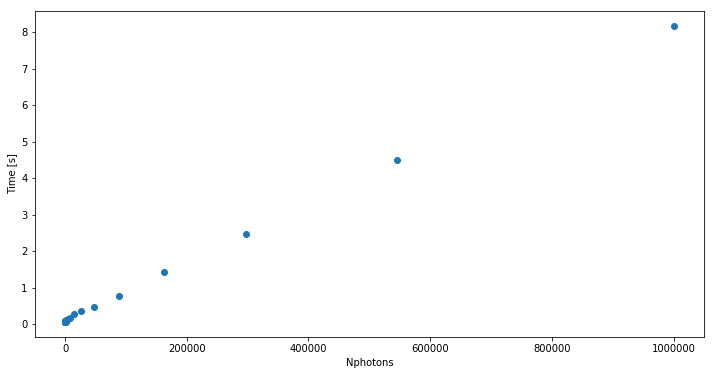

In [71]:
plt.figure(figsize=(12,6))
plt.scatter(Ns, times)

plt.xlabel("Nphotons")
plt.ylabel("Time [s]")
# plt.xscale("log")
# plt.yscale("log")

In [102]:
Nphotons = 200

blocks = Nphotons//threads_per_block + 1
N = blocks*threads_per_block

dt = 1.0
tInit = 0.0
PA = 0.01
PS = 0.05
pInit = [0.0, 0.0]
dInit = "random" #0.0


xlim = [-40, 40]
ylim = [-40, 40]
dx = 40
dy = 40
r = 2

doms, rs = create_doms(xlim, ylim, dx, dy, r)


dom_hits = []
times = []
for i in range(1000):
    if i%50 == 0:
        print i
    # Start time
    tstart = time.time()
    # Simulate
    hits, tzzz = simulate(Nexp, Nphotons, pInit, doms, rs, threads_per_block, pa=PA, ps=PS, verbose=False)
    dom_hits.append(hits)
    # End time
    tend = time.time()
    times.append(tend-tstart)

dom_hits = np.array(dom_hits)
times = np.array(times)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [98]:

# N

In [103]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial

In [104]:
def poisson(k, l):
    return (np.exp(-l)*(l**k)) / factorial(k)

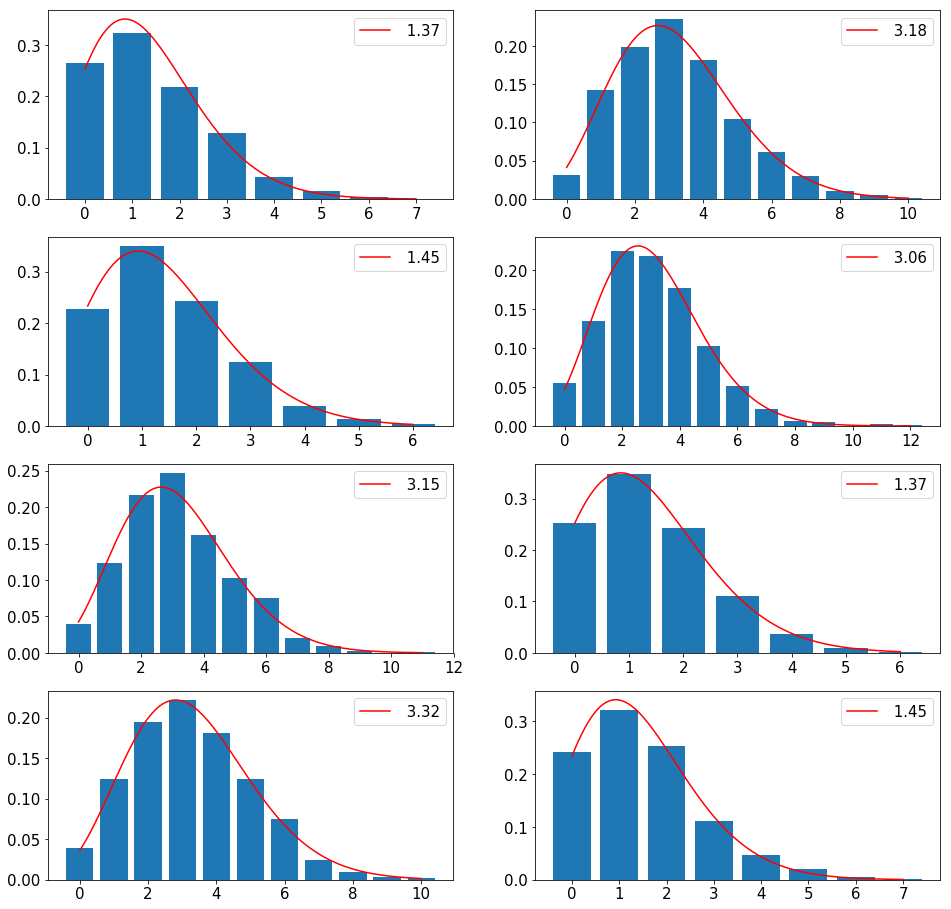

In [105]:
fig, axes = plt.subplots(4,2, figsize=(16,16))
axes = axes.flatten()
dom_hits = np.squeeze(dom_hits)
for i, ax in enumerate(axes):
    d = dom_hits[:,i]
    u, c = np.unique(d, return_counts=True)
    c = c.astype(float)
    c /= sum(c)
    popt, pcov = curve_fit(poisson, u, c)
    
    xmin, xmax = min(u), max(u)
    x = np.linspace(xmin, xmax, 1000)
    y = poisson(x, popt)
    
    ax.plot(x, y, color="r", zorder=3, label="%5.4s" % popt[0])
    ax.bar(u, c)
    ax.legend()

In [81]:
np.squeeze(dom_hits).shape

(1000, 8)